In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # hack---doing this sets the pandas plots to use seaborn styles!

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 500)

The PLUTO dataset used in this analysis and refered to in the file call below is the dataset that comes as a partial result of the work done in the companion `data-munging.ipynb` notebook.

In [5]:
pluto = pd.read_csv('nyc_pluto.csv', index_col=0)

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,20,22,23,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pluto.head(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,Bronx,0.0,8900.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.000009e+09,0.0,0.0,NaN,NaN,1c,NaN,NaN,NaN,NaN,NaN,NaN,3.0,16v1
1,Bronx,2260.0,1.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,Z9,NaN,0.0,NaN,122 BRUCKNER PARTNERS,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,5.0,130500.0,152100.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
2,Bronx,2260.0,4.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,G5,7.0,0.0,NaN,24 INDIAN HEAD HOLDIN,13770.0,752.0,752.0,0.0,272.0,0.0,0.0,480.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,5.0,117000.0,293850.0,0.0,18225.0,1931.0,NaN,1994.0,0.0,NaN,NaN,0.05,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
3,Bronx,2260.0,10.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,F9,6.0,0.0,P,ANJOST CORP,35000.0,39375.0,39375.0,0.0,0.0,0.0,0.0,0.0,39375.0,0.0,2.0,1.0,2.0,0.0,1.0,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,5.0,153000.0,822150.0,0.0,0.0,1931.0,NaN,0.0,0.0,NaN,NaN,1.13,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
4,Bronx,2260.0,17.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,E9,6.0,0.0,NaN,144 BRUCKNER LLC,2500.0,10625.0,10625.0,0.0,0.0,2125.0,0.0,0.0,8500.0,0.0,2.0,1.0,5.0,0.0,1.0,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,5.0,33750.0,227250.0,0.0,0.0,1931.0,NaN,2001.0,0.0,NaN,NaN,4.25,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1


In [6]:
# Integrity check: this ought to evaluate to 1, as we expect 'Borough', 'Block', 'Lot' to be a unique key.
np.max(pluto.groupby(['Borough', 'Block', 'Lot']).count().values)

1

# Address Density

How many addresses are there in each borough?

In [7]:
pluto['Borough'].value_counts()

Queens           324556
Brooklyn         277572
Staten Island    124022
Bronx             89897
Manhattan         43158
Name: Borough, dtype: int64

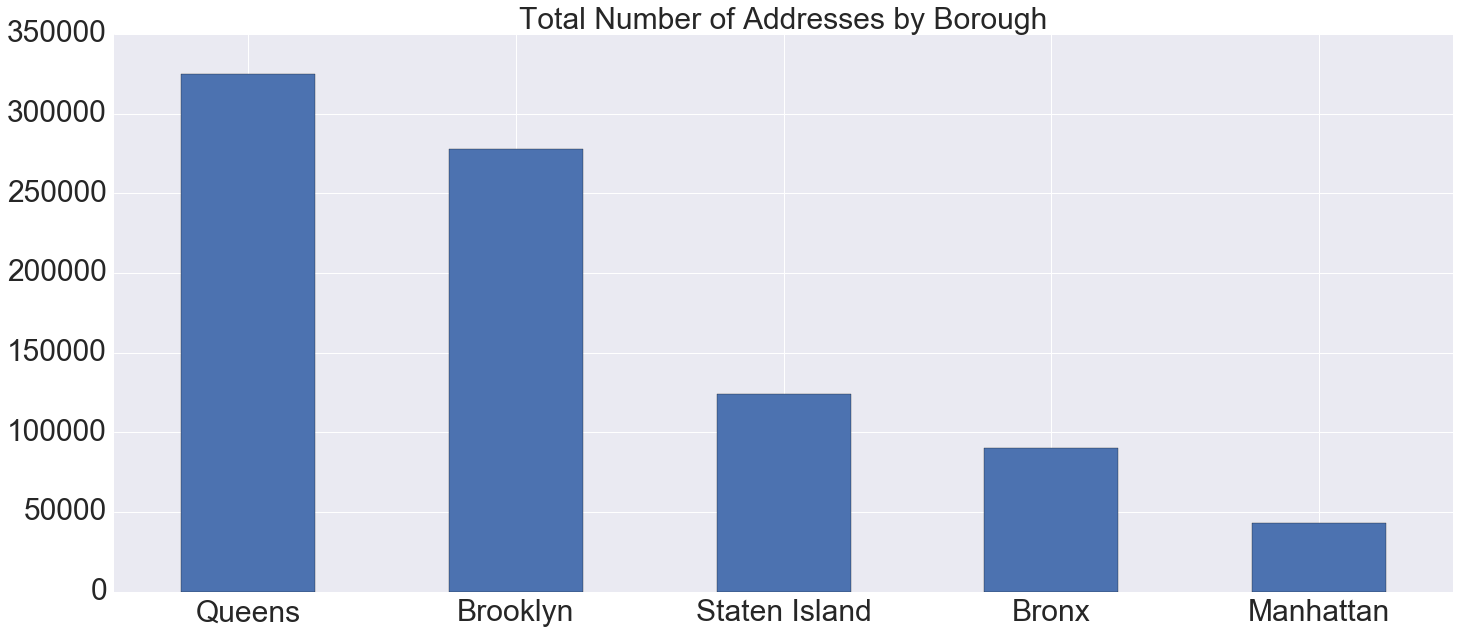

In [90]:
ax = pluto['Borough'].value_counts().plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Total Number of Addresses by Borough", fontsize=30)

In [12]:
pluto['Borough'].value_counts()[['Queens', 'Brooklyn']].sum() / pluto['Borough'].value_counts().sum() 

0.70079666668606444

Queens and Brooklyn dominate the rankings, with the two boroughs together composing over 70% of addresses in New York City. Manhattan by contrast provides just 5% of them. Staten Island and the Bronx split the remaining difference at just over and just under 12.5% each, respectively. In other words, for every 1 address in Manhattan, there are 2 in the Bronx, 3 in Staten Island, 6 in Brooklyn, and 8 in Queens!

The scale of the difference between the number of residences in Manhattan and the number in the other boroughs is surprising, but to truly interpret this result we need to keep the sizes and populations of each borough in mind. Manhattan squeezes about two-thirds the population of Queens onto an island one-quarter the size, for example, a fact that defies easy classification.

A city block in Manhattan is wider than it is long, with each horizontal avenue measuring out approximately three diagonal streets in length <!--(ever been to [6 1/2 Avenue](https://en.wikipedia.org/wiki/6%C2%BD_Avenue)?)-->. [Using a figure given by *The New York Times* in 2006](http://www.nytimes.com/2006/09/17/nyregion/thecity/17fyi.html?_r=0) (if you like this sort of thing&mdash;I know I do&mdash;also check out [the breakdown given in the 1892 World Almanac](http://stuffnobodycaresabout.com/2012/11/19/all-new-york-city-streets-are-not-created-equal/)), this makes for ~140 streets per square mile. By summing up the total lot areas and filtering out parks and greenspaces we can measure the average number of properties per city block:

In [13]:
# pluto[pluto['Address'] == 'BODY OF WATER'] # srs?

In [14]:
non_park_pluto = pluto[(pluto['Address'].notnull()) & 
                  (pluto['ZoneDist1'] != 'PARK') &
                  (pluto['ZoneDist1'] != 'PARKNYS') &
                  (pluto['ZoneDist1'] != 'PARKUS') &
                  (pluto['ZoneDist1'] != 'ZNA')
                 ]

In [15]:
# According to Wikipedia the areas are 42, 71, 23, 109, and 58 square miles, respectively.
# However we are going by total lot area for actual building lots, which will be significantly less.
# A further correction, we will remove lots without addresses and parks from consideration.
lot_areas = non_park_pluto.groupby(['Borough'])['LotArea'].sum().map(lambda x: x / 27878400)
lot_areas

Borough
Bronx            23.680097
Brooklyn         41.117435
Manhattan        13.074886
Queens           70.542453
Staten Island    36.943998
Name: LotArea, dtype: float64

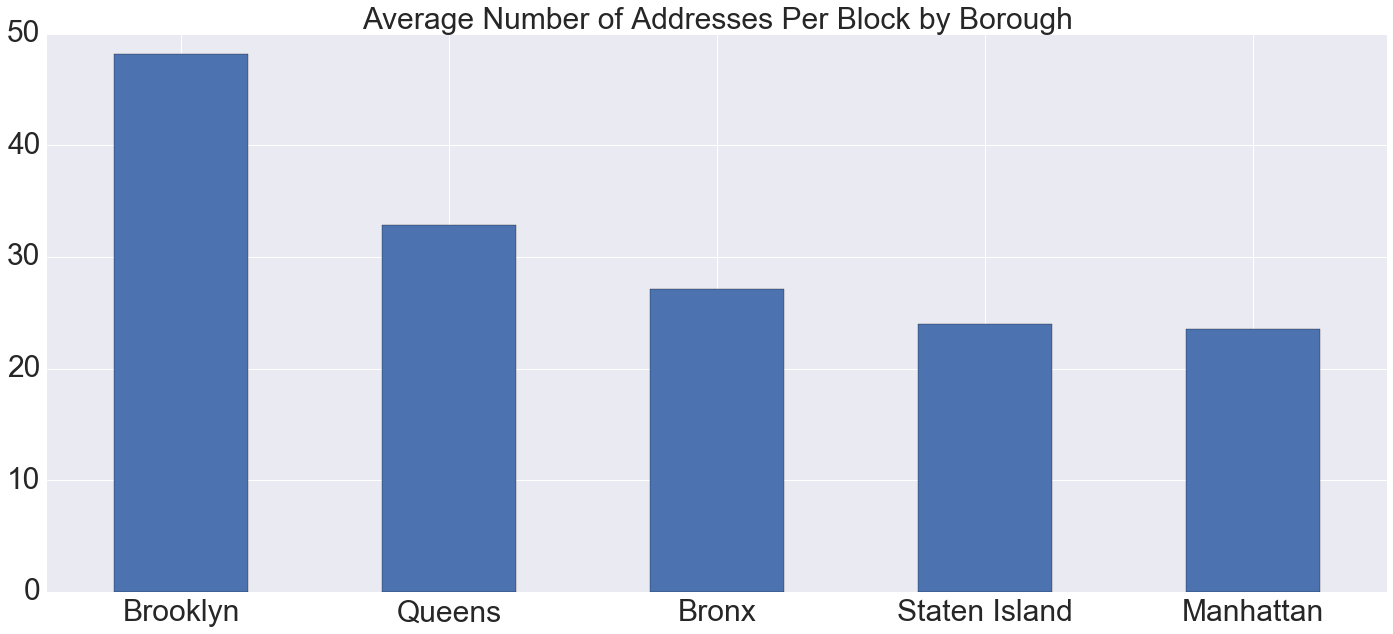

In [91]:
# boroughs = pd.DataFrame({'borough': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
#                          'population': [1636268, 1438159, 2621793, 2321580, 473279],
#                          'area': [23, 42, 71, 109, 58]}).set_index('borough')

# NEED TO ANNOTATE THESE LATER:
# http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# DO IT!

boroughs = pd.DataFrame({'population': [1636268, 1438159, 2621793, 2321580, 473279],
                         'area': lot_areas},
                         index=lot_areas.index)

address_data = (pluto['Borough'].value_counts().sort_index() /
                boroughs['area'].sort_index()
                / 140).sort_values(ascending=False)
ax = address_data.plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Addresses Per Block by Borough", fontsize=30)

Brooklyn is easily the densest of the boroughs, packing twice as many addresses per block as Manhattan, the land of skyscrapers.

Staten Island is comparably dense with Manhattan. Staten Island is the most suburban of the five boroughs, so lots there are larger as a natural consequence of its lower population density and cooler real estate market.

The Bronx by contrast, as a consequence of its late development relative to the history of the other boroughs, is the most consolidated of the outer boroughs, netting it a disproportionate share of the city's apartment complexes and [project housing](https://en.wikipedia.org/wiki/List_of_New_York_City_Housing_Authority_properties).

These facts becomes easy to see if we swap to measuring density by number of persons per address.

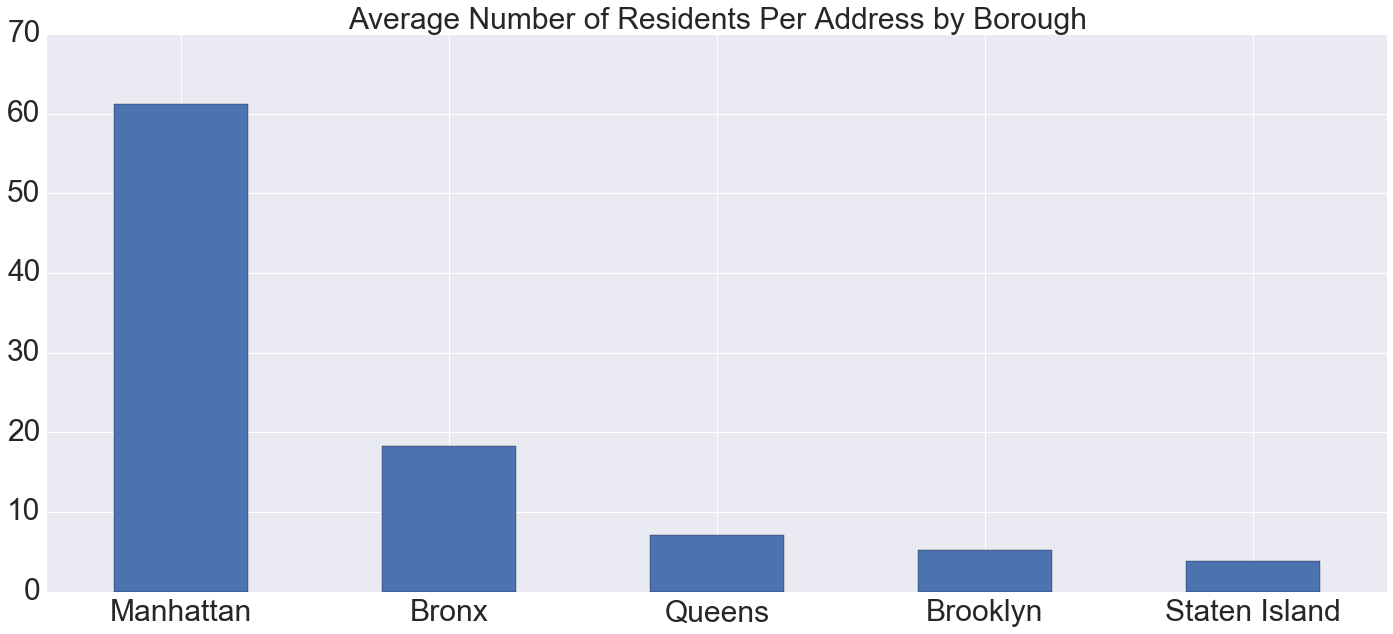

In [92]:
# NEEDS LABELS! See the earlier note.
person_data = (boroughs['population'].sort_index() /
               non_park_pluto['Borough'].value_counts().sort_index()).sort_values(ascending=False)
person_data.index.name = ''
ax = person_data.plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Residents Per Address by Borough", fontsize=30)

Manhattan absolutely crushes this ranking, packing fifteen times as many people per address (approximately 61) as Staten Island does (approximately 4)!

As per our discussion before, the Bronx (approximately 18 residents per addresss) is two-and-a-half as dense per address as runner-up Queens is (approximately 7 residents per address).

Queens fits somewhat fewer people (2.3 versus 2.6 million) onto a significantly greater area (109 versus 71 square miles), yet&mdash;as a consequence of having such a smaller lot size&mdash;Brooklyn nevertheless has significantly fewer people per building (approximately 5 residents per address).

If we mix these two metrics up we can compute the average number of people per block for each of the boroughs.

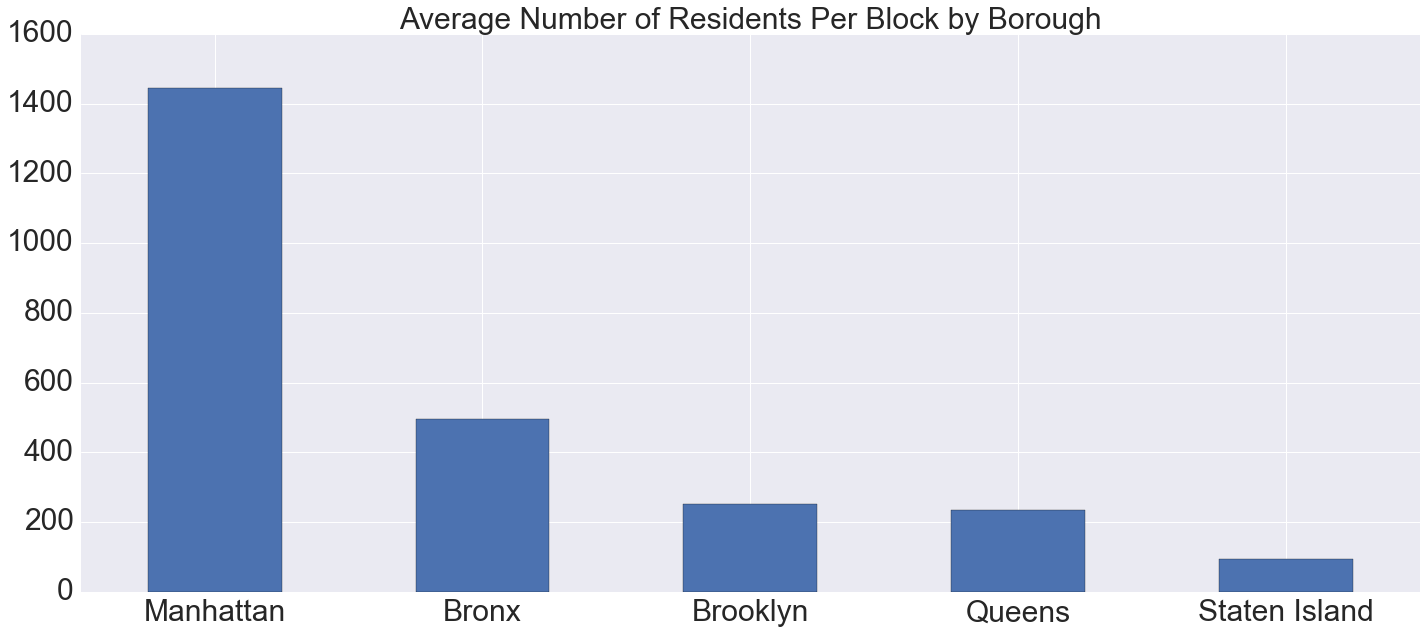

In [93]:
ax = (person_data * address_data).sort_values(ascending=False).plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Residents Per Block by Borough", fontsize=30)

Though Brooklyn and Queens again swap places, the overall picture is about the same.

So far we've stuck to computations by borough, but let's try to aggregate the data on a more local level. The definition of a neighborhood is a slippery one&mdash;where does Little Italy end and Chinatown begin?&mdash;so a discrete boundary&mdash;like, say, [ZIP codes](http://nyc.pediacities.com/New_York_City_ZIP_Codes)&mdash;is more appropriate.

In [16]:
(person_data * address_data)

Bronx             496.812932
Brooklyn          250.574097
Manhattan        1443.870472
Queens            235.848165
Staten Island      92.817792
dtype: float64

It's a pointfile, not a shapefile! Argh! Will need to cast around for a solution.

## Address Length

What would *you* do with a record of every address in New York City?

To start with, let's take a look at addresses by character length. Not every property in New York City has an address: parks don't, for instance, nor do many empty lots, though others get assigned the name of the nearest largest street. There are also a handful of "other options" in the dataset as well: for instance there are several entities addressed as `BODY OF WATER`, and at least one, I kid you not, `CLIFF` (missing coordinate data too&mdash;natch).

Let's assume that a valid address is of the form `120 COURT STREET`, that is, an address number followed by at least two strings seperate strings for the street. There's one important exception to this rule&mdash;Manhattan piers are simply a pier and a number, e.g. `PIER 19`. We'll include those, too.

In [29]:
def map_address_length(address):
    if len(address.split(' ')) >= 3 or 'PIER' in address and len(set.intersection({str(n) for n in range(1, 10)}, set(address))) > 0:
            return int(len(address.replace(' ', '')))
    else:
        return None

In [30]:
map_address_length('PIER 12'), map_address_length('2 COURT STREET'), map_address_length('2 COURT')

(6, 12, None)

In [31]:
address_lengths = pluto[pluto['Address'].notnull()]['Address'].map(map_address_length)

In [32]:
# PIER 9 is a defunct restaurant address which is the sole 5-lengther, so let's remove it.
address_lengths = address_lengths[address_lengths >= 6]

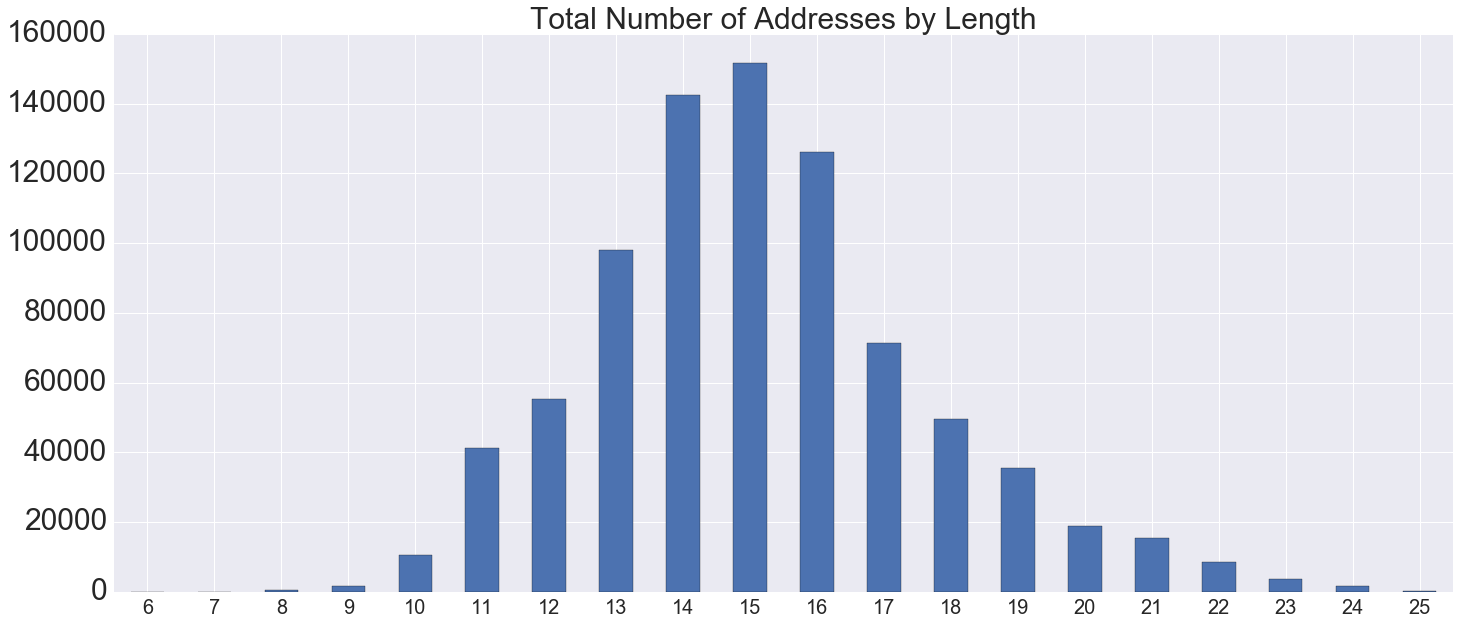

In [44]:
ax = address_lengths.value_counts().sort_index().plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], fontsize=20, ha='center', rotation=0)
ax.set_title("Total Number of Addresses by Length", fontsize=30)

In [22]:
address_lengths.value_counts()[[14, 15, 16]].sum() / address_lengths.value_counts().sum()

0.50509447253336415

In [23]:
address_lengths.value_counts()[range(5, 14)].sum(), address_lengths.value_counts()[range(17, 25)].sum()

(207209.0, 204326)

In [24]:
address_lengths.describe()

count    831882.000000
mean         15.139373
std           2.521332
min           6.000000
25%          14.000000
50%          15.000000
75%          16.000000
max          25.000000
Name: Address, dtype: float64

In [25]:
# pluto.iloc[address_lengths[address_lengths == 5].index]

In [26]:
pluto.iloc[address_lengths[address_lengths == 25].index].sample(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
552755,Queens,13263.0,4.0,413.0,638.0,2011.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,7C,138-79 BROOKVILLE BOULEVARD,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,A2,1.0,0.0,NaN,CHIAN CORBIN,6535.0,1196.0,0.0,1196.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.75,1.0,1.0,58.0,112.67,22.00,26.00,G,1.0,N,3.0,2.0,8566.0,21240.0,1550.0,1550.0,1925.0,E,0.0,0.0,NaN,NaN,0.18,0.6,0.0,1.0,4.0,4.132630e+09,0.0,638.0,1056935.0,182239.0,19b,NaN,414 106,45505.0,NaN,0.0,NaN,1.0,16v1
552120,Queens,13221.0,15.0,413.0,638.0,1007.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,7C,135-27 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A2,1.0,0.0,NaN,"POWELL, LARRY",5280.0,1412.0,0.0,1412.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.50,1.0,1.0,60.0,88.00,26.00,38.00,G,1.0,N,5.0,2.0,11319.0,27955.0,0.0,0.0,1940.0,E,0.0,0.0,NaN,NaN,0.27,0.5,0.0,1.0,4.0,4.132210e+09,0.0,638.0,1057806.0,183989.0,19a,NaN,414 079,45505.0,NaN,0.0,NaN,1.0,16v1
560724,Queens,13746.0,2.0,413.0,694.0,1013.0,29.0,31.0,11422.0,E314,105.0,3620.0,4.0,13.0,7E,148-47 BROOKVILLE BOULEVARD,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,C0,2.0,0.0,NaN,"CARDOZA, KENNISHA T",2506.0,1736.0,0.0,1736.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.00,3.0,3.0,39.0,82.00,21.67,38.00,G,2.0,Y,5.0,1.0,5280.0,20224.0,1550.0,1550.0,1960.0,E,0.0,0.0,NaN,NaN,0.69,0.6,0.0,1.0,4.0,4.137460e+09,0.0,694.0,1054708.0,177467.0,19b,NaN,417 034,45703.0,NaN,0.0,NaN,1.0,16v1
560622,Queens,13742.0,4.0,413.0,694.0,1011.0,29.0,31.0,11422.0,E314,105.0,3620.0,4.0,13.0,7E,147-85 BROOKVILLE BOULEVARD,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,B2,1.0,0.0,NaN,MOISE CATHERINE,3198.0,3113.0,0.0,2264.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.00,2.0,2.0,47.0,89.00,35.00,35.67,G,1.0,Y,5.0,1.0,6766.0,29383.0,1550.0,1550.0,1950.0,E,0.0,0.0,NaN,NaN,0.97,0.6,0.0,1.0,4.0,4.137420e+09,0.0,694.0,1055016.0,178019.0,19b,NaN,417 034,45703.0,NaN,0.0,NaN,1.0,16v1
552119,Queens,13221.0,13.0,413.0,638.0,1007.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,7C,135-33 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,B2,1.0,0.0,NaN,"NARCISSE, YVROSE",3520.0,2500.0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.50,2.0,2.0,40.0,88.00,25.00,50.00,G,1.0,N,5.0,1.0,7424.0,28200.0,1550.0,1550.0,1950.0,E,0.0,0.0,NaN,NaN,0.71,0.5,0.0,1.0,4.0,4.132210e+09,0.0,638.0,1057787.0,183943.0,19a,NaN,414 079,45505.0,NaN,0.0,NaN,1.0,16v1


It seems that address lengths (excluding spaces) are approximately normally distributed in New York City, and surprisingly tightly so: **half of the addresses in New York City come in at 14, 15, or 16 characters long**.

Non-mean address lengths distribute approximately evenly into either tail, but the right tail is slightly thinner and longer&mdash;e.g. "long" addresses tend to be especially long, whilst "short" addresses tend to be only somewhat shorter than average.

There is no single shortest address in New York City: there are a number of two-number piers, e.g. `PIER 40`, `PIER 52`, etc. Following up on these, there are a sizable number of short place-names, such as `74 6 ROAD` in Queens or `5 3 PLACE` in Brooklyn, which seem to occur mostly in these two boroughs.

There is also no single longest address: there are over a hundred addresses in Queens on Woodhaven Boulevard with names like `103-29A WOODHAVEN BOULEVARD` which take the prize for longest in the city.

The following GIF plays it all out.

*Animated GIF of the addresses by character count.*

# Address Characteristics

Let's tokenize address endings to see which words are most common.

In [51]:
from collections import Counter
from tqdm import tqdm

end_address_tokens = Counter()

# We split and take [-1:] to remove the address non-ending from consideration.
for words in tqdm([address.split(' ')[-1:] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    end_address_tokens.update(words)

100%|██████████████████████████████| 858649/858649 [00:03<00:00, 274576.23it/s]


In [52]:
def is_number(element):
    try:
        float(element)
    except ValueError:
        return False
    return True

In [29]:
# Chart is not that helpful...
# pd.Series({token[0]: token[1] for token in address_tokens.most_common(200) if not is_number(token[0])}).sort_values(ascending=False).plot(kind='bar', figsize=(30, 12))

In [53]:
from prettypandas import PrettyPandas

In [54]:
# This is the full table, paste this to Gist!
top_endings = pd.DataFrame.from_records([token for token in end_address_tokens.most_common(400) if not is_number(token[0]) and len(token[0]) > 1],
                                        columns=['Token', 'Occurances'])
top_endings.index = top_endings.index + 1
top_endings.index.name = 'Rank'
# Make an effort to merge certain extremely common abbreviations.
# top_100.iloc[0, 1] = top_100.iloc[0, 1] + top_100.iloc[14, 1] # St -> Street
# top_100.iloc[6, 1] = top_100.iloc[6, 1] + top_100.iloc[13, 1] # Blvd > Boulevard
# top_100 = top_100.drop([14, 15])

top_endings['Token'] = top_endings['Token'].map(str.title)
top_endings = top_endings.sort_values(by='Occurances', ascending=False)
top_endings = top_endings.reindex()
PrettyPandas(top_endings)

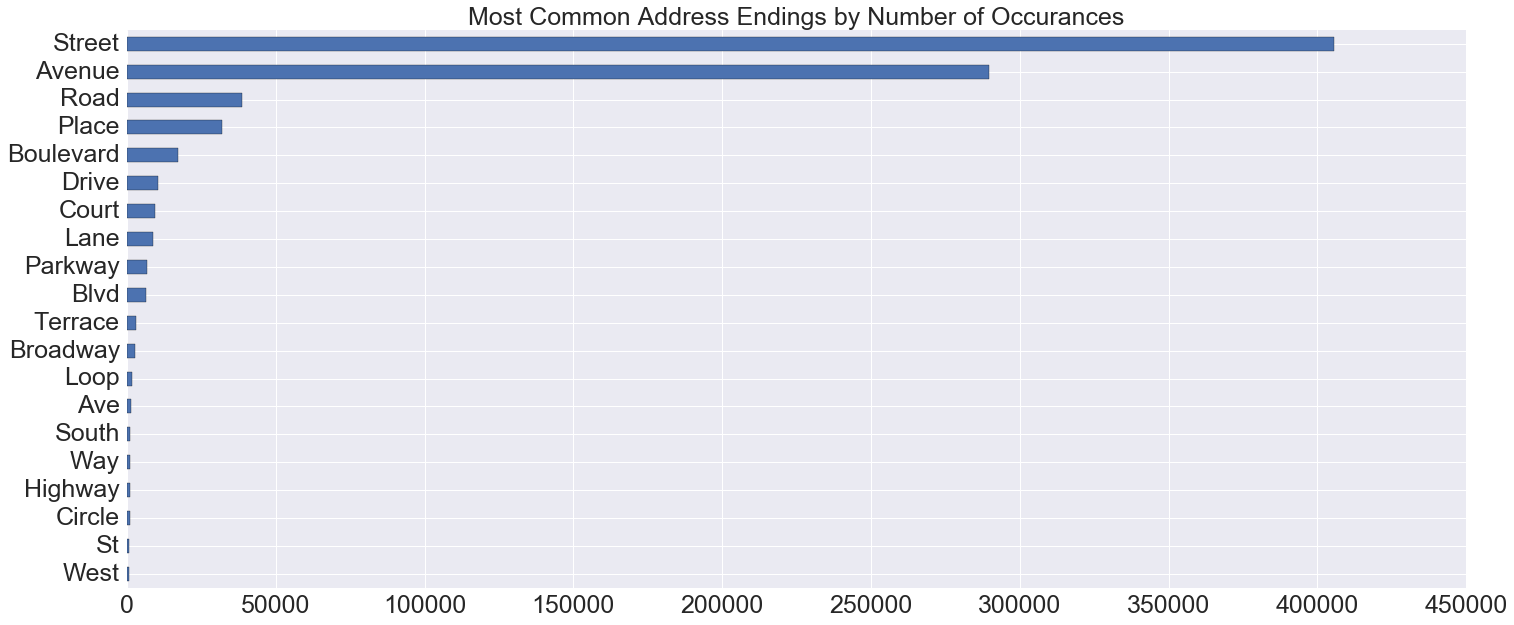

In [79]:
p = top_endings[:20].set_index('Token')['Occurances'].sort_values()
p.index.name = ""
p.title = ""
p.name = ""
ax = p.plot(figsize=(24, 10), kind='barh', fontsize=25)
ax.set_title("Most Common Address Endings by Number of Occurances", fontsize=25)

In [33]:
top_endings[:2]['Occurances'].sum() / top_endings['Occurances'].sum()

0.82221031983910497

In [34]:
top_endings[:20]['Occurances'].sum() / top_endings['Occurances'].sum()

0.99240927487292629

Place-name endings have very little variety, with **82% of the addresses in New York City ending in either "Street" or "Avenue"**. **The top 20 most common tokens cover over 99% of addresses in New York City**!

# Address Depth

In [80]:
filtered_pluto = pluto[pluto['Address'].notnull()]
# There are a lot of junk results for empty lots which don't have a specified lot number but whatever.
# Those entries we can simply filter out by hand, given the scope of the analysis.
filtered_pluto['Street'] = filtered_pluto['Address'].map(lambda a: ' '.join(a.split(' ')[1:]))

C:\Users\Alex\Anaconda3\envs\nyc-buildings\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
street_tokens = Counter()

for borough, street in zip(filtered_pluto['Borough'].values, filtered_pluto['Street'].values):
    if street not in ['AVENUE', 'STREET', 'ROAD']:
        street_tokens.update([(borough, street.title())])

In [82]:
n = 2000
boroughs = [count[0][0] for count in street_tokens.most_common(n)]
streets = [count[0][1] for count in street_tokens.most_common(n)]
counts = [count[1] for count in street_tokens.most_common(n)]

address_counts = pd.DataFrame({'Borough': boroughs, 'Street': streets, 'Count': counts})
address_counts.index += 1
address_counts.index.name = 'Rank'

In [38]:
address_counts[(address_counts['Borough'] == 'Manhattan') & (address_counts['Street'] == 'Broadway')]['Count'].values[0] + address_counts[(address_counts['Borough'] == 'Bronx') & (address_counts['Street'] == 'Broadway')]['Count'].values[0]

1118

Broadway appears on this list because of its almost unique habit of naming addresses all on its own: whilst a building on another avenue would be `123 3rd Avenue`, when they are on Broadway they are more usually, *but not always*, simply `123 Broadway`. Combined with the fact that [the Broadway is the longest street in New York City](https://en.wikipedia.org/wiki/Broadway_%28Manhattan%29) (and the only one I'm aware of which crosses two boroughs), this makes Broadway one of the most heavily addressed street in New York City, with 1118 addresses overall.

Expanding on this observation, here are the five most heavily addressed streets in each borough:

In [39]:
import matplotlib as plt

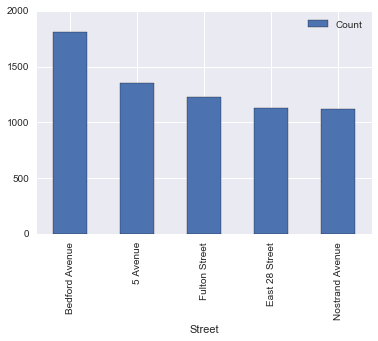

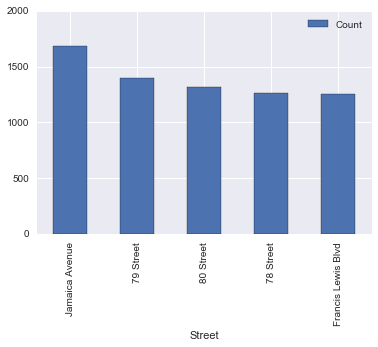

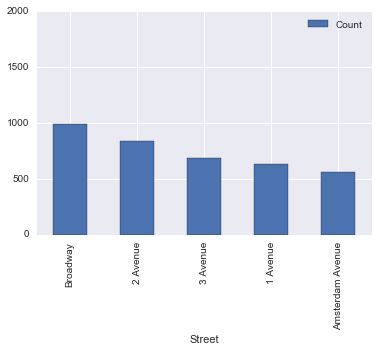

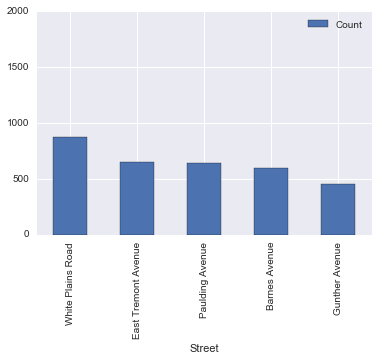

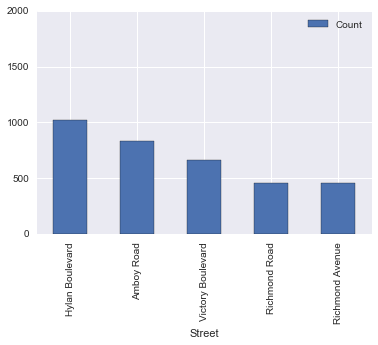

In [51]:
def bar_chart_it(df):
    return df.plot.bar(x='Street', y='Count', ylim=[0, 2000])

brooklyn = bar_chart_it(address_counts[address_counts['Borough'] == 'Brooklyn'][:5])
queens = bar_chart_it(address_counts[address_counts['Borough'] == 'Queens'][:5])
manhattan = bar_chart_it(address_counts[address_counts['Borough'] == 'Manhattan'][:5])
bronx = bar_chart_it(address_counts[address_counts['Borough'] == 'Bronx'][:5])
staten_island = bar_chart_it(address_counts[address_counts['Borough'] == 'Staten Island'][:5])

*To save myself a headache I hand-parallelized the charts using Inkscape.*

!['stuff'](most_heavily_addressed_streets_per_borough.png 'stuff')

In [69]:
import mplleaflet
from pyproj import Proj
import matplotlib.pyplot as plt

In [75]:
import scipy

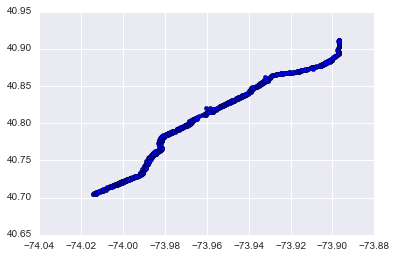

In [90]:
# Extract filled Broadway coordinates.
coords = pluto[pluto['Address'].map(lambda a: ('BROADWAY' in str(a)) & ('EAST' not in str(a)) & ('WEST' not in str(a)))][['XCoord', 'YCoord', 'Borough']]
coords = coords[(coords['Borough'] == 'Manhattan') | (coords['Borough'] == 'Bronx')]
coords = coords.dropna()
# Reproject from state grid to global coordinates.
projstr = '+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
pnyc = Proj(projstr,
            preserve_units=True)
coords = [pnyc(x, y, inverse=True) for x, y in zip(coords['XCoord'], coords['YCoord'])]

# Plot the resulting scatter.
plt.scatter([c[0] for c in coords], [c[1] for c in coords])
# mplleaflet.show()
plt.show()

In [124]:
# Apply a linear regression to get general orientation.
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress([c[0] for c in coords], [c[1] for c in coords])

# Get the coordinate on the line each point is closest to by solving for the residual.
r_slope = -1/slope
closest_linear_coords = []
for x, y in coords:
    b = y - r_slope*x
    x_int = (intercept - b)/(r_slope - slope)
    y_int = slope*x_int + intercept
    closest_linear_coords.append((x_int, y_int))
# plt.plot([c[0] for c in closest_linear_coords], [c[1] for c in closest_linear_coords])
# Since we now have a line we can pick a major axis and rank points based on their position on that axis.
x_extent = max([c[0] for c in closest_linear_coords]) - min([c[0] for c in closest_linear_coords])
y_extent = max([c[1] for c in closest_linear_coords]) - min([c[1] for c in closest_linear_coords])
if x_extent >= y_extent:
    array = np.array([c[0] for c in closest_linear_coords])
else:
    array = np.array([c[1] for c in closest_linear_coords])
order = array.argsort()
ranks = order.argsort()
sorted_coords = list(zip([c[0] for c in coords], [c[1] for c in coords], ranks))
sorted_coords.sort(key=lambda x: x[2])
sorted_coords = [(x, y) for x, y, rank in sorted_coords]
plt.plot([c[0] for c in sorted_coords], [c[1] for c in sorted_coords])
# At this point we have successfully constructed our line!
mplleaflet.show()

In [125]:
# Our addresses are on either side of the street, while we want the center.
# The first step to remapping the points is computing centroids so that our points move onto the street.
centroid_coords = []
for i in range(0, len(sorted_coords) - 4):
    x_c = (sorted_coords[i][0] + sorted_coords[i + 1][0] + sorted_coords[i + 2][0] + sorted_coords[i + 3][0] + sorted_coords[i + 4][0]) / 5
    y_c = (sorted_coords[i][1] + sorted_coords[i + 1][1] + sorted_coords[i + 2][1] + sorted_coords[i + 3][1] + sorted_coords[i + 4][1]) / 5
    centroid_coords.append((x_c, y_c))
plt.plot([c[0] for c in centroid_coords], [c[1] for c in centroid_coords])
mplleaflet.show()

In [136]:
# Then we simplify the result with a Visvalignam-Wyatt polyline simplification algorithm to generate a finished
# smooth curve!
import visvalingamwyatt as vw
simplifier = vw.Simplifier(centroid_coords)
# simplified_coords = simplifier.simplify(ratio=0.05)
simplified_coords = simplifier.simplify(number=20)
plt.plot([c[0] for c in simplified_coords], [c[1] for c in simplified_coords])
mplleaflet.show()

In [153]:
import math

In [208]:
import mplleaflet
from pyproj import Proj
import matplotlib.pyplot as plt
import scipy
import visvalingamwyatt as vw
import math

projstr = '+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
pnyc = Proj(projstr,
            preserve_units=True)

"""
Given a pandas DataFrame containing addressal information derived from PLUTO, generates a list of coordinates
associated with the given street.

df: The PLUTO-derived pandas DataFrame from which the information is being drawn.
proj: The reusable pyproj projection that is being used to map coordinates from the state grid to global coordinates.
street_name: The name of the street that you want coordinates for. Must be in all-caps and must match the notation
used in the PLUTO dataset.
n: The number of points in the final polyline. For best results this parameter should be tuned to match the complexity
of the street: e.g. since most streets are linear, despite the complexity of the algorithm just n=2 will provide the
best results.
"""
def generate(df, proj, street_name, n=20):
    # Extract non-empty coordinates.
    coords = df[df['Street'].map(lambda a: street_name in str(a))][['XCoord', 'YCoord', 'Borough']]
    coords = coords.dropna()
    coords = [proj(x, y, inverse=True) for x, y in zip(coords['XCoord'], coords['YCoord'])]
    # Apply a linear regression to get general orientation.
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress([c[0] for c in coords], [c[1] for c in coords])
    # Get the coordinate on the line each point is closest to by solving for the residual.
    r_slope = -1/slope
    closest_linear_coords = []
    for x, y in coords:
        b = y - r_slope*x
        x_int = (intercept - b)/(r_slope - slope)
        y_int = slope*x_int + intercept
        closest_linear_coords.append((x_int, y_int))
    # Since we now have a line we can pick a major axis and rank points based on their position on that axis.
    x_extent = max([c[0] for c in closest_linear_coords]) - min([c[0] for c in closest_linear_coords])
    y_extent = max([c[1] for c in closest_linear_coords]) - min([c[1] for c in closest_linear_coords])
    if x_extent >= y_extent:
        array = np.array([c[0] for c in closest_linear_coords])
    else:
        array = np.array([c[1] for c in closest_linear_coords])
    order = array.argsort()
    ranks = order.argsort()
    sorted_coords = list(zip([c[0] for c in coords], [c[1] for c in coords], ranks))
    sorted_coords.sort(key=lambda x: x[2])
    sorted_coords = [(x, y) for x, y, rank in sorted_coords]
    # Remove false positive coordinates which are more than a certain distance from their preceding neighbor.
    # Otherwise random buildings with the same street in their address get included in the plot!
    i = 1
    while True:
        if math.sqrt((sorted_coords[i][0] - sorted_coords[i - 1][0])**2 + (sorted_coords[i][1] - sorted_coords[i - 1][1])**2) > 0.01:
            del sorted_coords[i]
        else:
            i += 1
        if i > len(sorted_coords) - 1:
            break
    # plt.plot([c[0] for c in sorted_coords], [c[1] for c in sorted_coords])
    centroid_coords = []
    for i in range(0, len(sorted_coords) - 4):
        x_c = (sorted_coords[i][0] + sorted_coords[i + 1][0] + sorted_coords[i + 2][0] + sorted_coords[i + 3][0] + sorted_coords[i + 4][0]) / 5
        y_c = (sorted_coords[i][1] + sorted_coords[i + 1][1] + sorted_coords[i + 2][1] + sorted_coords[i + 3][1] + sorted_coords[i + 4][1]) / 5
        centroid_coords.append((x_c, y_c))
    simplifier = vw.Simplifier(centroid_coords)
    # simplified_coords = simplifier.simplify(ratio=0.05)
    simplified_coords = simplifier.simplify(number=n)
    return simplified_coords

"""
Given a list of coordinates, plots them using mplleaflet.
"""
def plot_coordinates(coords):
    plt.plot([c[0] for c in coords], [c[1] for c in coords], color='black')
    mplleaflet.show()

In [200]:
# plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Staten Island'], pnyc, 'RICHMOND ROAD'))
# plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Manhattan'], pnyc, '2 AVENUE', n=2))
plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Bronx'], pnyc, 'WHITE PLAINS ROAD', n=5))

In [209]:
plot_coordinates(generate(filtered_pluto, pnyc, 'JAMAICA AVENUE', n=10))

In [205]:
[(name.upper(), borough) for name, borough in zip(address_counts[:20]['Street'].values, address_counts[:20]['Borough'].values)]

[('BEDFORD AVENUE', 'Brooklyn'),
 ('JAMAICA AVENUE', 'Queens'),
 ('79 STREET', 'Queens'),
 ('5 AVENUE', 'Brooklyn'),
 ('80 STREET', 'Queens'),
 ('78 STREET', 'Queens'),
 ('FRANCIS LEWIS BLVD', 'Queens'),
 ('FULTON STREET', 'Brooklyn'),
 ('76 STREET', 'Queens'),
 ('EAST 28 STREET', 'Brooklyn'),
 ('NOSTRAND AVENUE', 'Brooklyn'),
 ('EAST 29 STREET', 'Brooklyn'),
 ('77 STREET', 'Queens'),
 ('HANCOCK STREET', 'Brooklyn'),
 ('75 STREET', 'Queens'),
 ('JEFFERSON AVENUE', 'Brooklyn'),
 ('BERGEN STREET', 'Brooklyn'),
 ('84 STREET', 'Queens'),
 ('88 STREET', 'Queens'),
 ('HYLAN BOULEVARD', 'Staten Island')]

If you're interested in Manhattan addressing&mdash;questions like where are the low numbers, where are the high numbers, and how are address numbers distributed throughout&mdash;Ben Wellington of IQuantNY published [an excellent analysis on the subject](http://iquantny.tumblr.com/post/102509139169/colorfully-decoding-manhattans-address-system) a few years ago which is worth reading. The conclusions there ought to extend to greater New York City, so I won't reiterate them myself&mdash;read it!

In [43]:
number_tokens = Counter()

for words in tqdm([address.split(' ')[:1] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    number_tokens.update(words)

100%|██████████| 858649/858649 [00:05<00:00, 144370.49it/s]


In [44]:
# Not useful! This is probably an error: ought to be "150 123 Street" perhaps?

def is_number(n):
    try:
        int(n)
    except ValueError:
        return False
    return True

np.max([int(num) for num, value in number_tokens.items() if is_number(num)])

150123

One final surprise result: though both rank highly in usage, `West` is three times as popular in New York City addresses as `East` is. `North` and `South`, by contrast, are nowhere to be found.

In [85]:
address_tokens = Counter()

for words in tqdm([address.split(' ') for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    address_tokens.update(words)

100%|██████████████████████████████| 858649/858649 [00:03<00:00, 254701.85it/s]


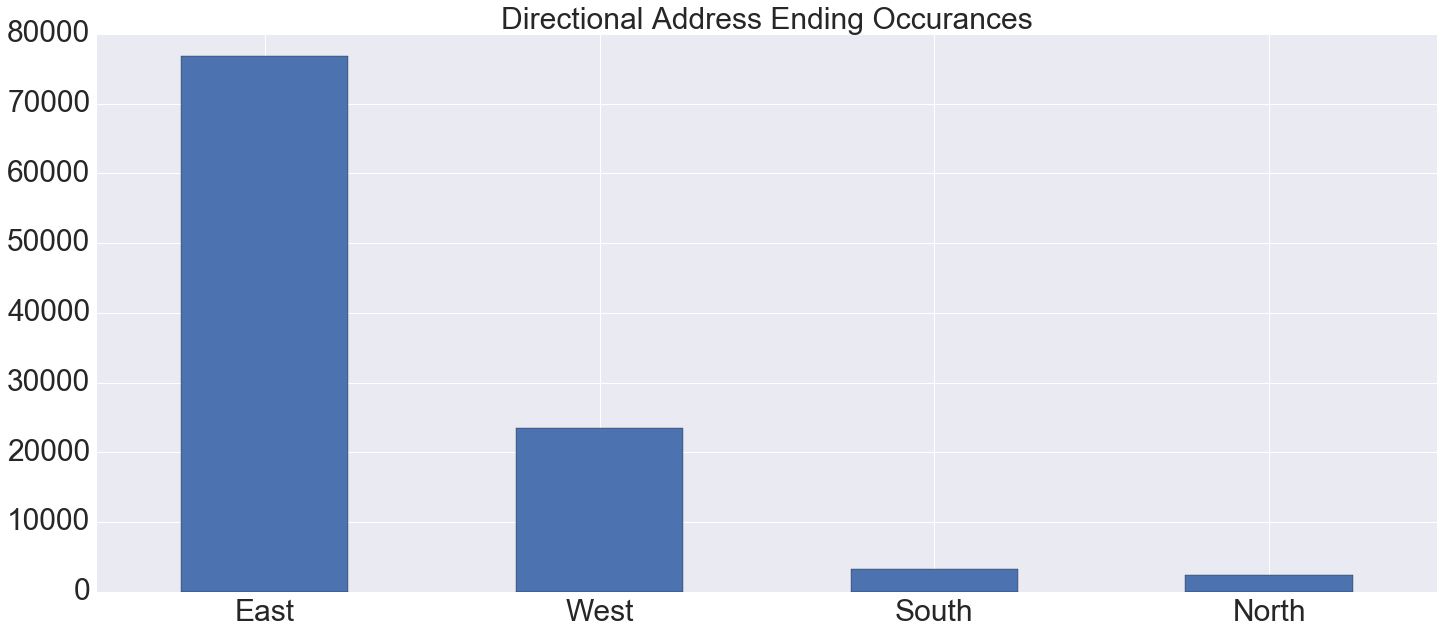

In [99]:
ax = pd.Series({token.title(): address_tokens[token] for token in ['NORTH', 'SOUTH', 'EAST', 'WEST']}).sort_values(ascending=False).plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Directional Address Ending Occurances", fontsize=30)

In [46]:
ownership_by_type = pluto['OwnerType'].value_counts(dropna=False)
ownership_by_type['P'] += ownership_by_type[ownership_by_type.isnull().values[0]]
ownership_by_type = ownership_by_type[1:]
ownership_type_map = {  'P': 'Private',
                        'C': 'Public',
                        'M': 'Mixed',
                        'O': 'Public',
                        'X': 'Mixed'
                     }
ownership_by_type.index = [ownership_type_map[x] for x in ownership_by_type.index]
ownership_by_type = ownership_by_type.groupby([ownership_by_type.index]).sum().sort_values(ascending=False)
ownership_by_type = ownership_by_type.map(lambda x: x / 859464 * 100)
ownership_by_type.name = '%'
ownership_by_type.index.name = 'Use'

In [47]:
PrettyPandas(ownership_by_type).total()

In [48]:
codes = {1: 'One/Two-Family',
         2: 'Multi-Family Walkup',
         3: 'Multi-Family Elevator',
         4: 'Mixed Residential/Commercial',
         5: 'Commercial/Office',
         6: 'Industrial',
         7: 'Transport/Utility',
         8: 'Public Facility',
         9: 'Open/Green Space',
         10: 'Parking Lot',
         11: 'Vacant'}

land_use_data = pluto['LandUse'][pluto['LandUse'].notnull()].map(lambda x: codes[x]).value_counts()

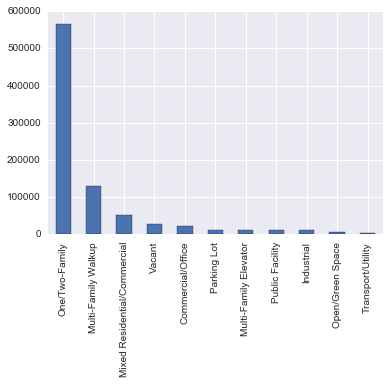

In [49]:
land_use_data.plot(kind='bar')

*Break this down by value and building area too!*